In [51]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [52]:
#usual matrix multiplication, loop
usual_matmul = np.genfromtxt('usual_matrix_multiplication.txt')[:,2]
#loop order
cache_matmul = np.genfromtxt('cache-friendly_matrix_multiplication.txt')[:,2]
#fortran built in
fortran_matmul = np.genfromtxt('fortran_matrix_multiplication.txt')[:,2]

#dimension
N = np.genfromtxt('usual_matrix_multiplication.txt')[:,1]

With $y=CPU time, \; x = N$ the square matrix size, I have to fit a polynomial $y = ax^b$. This is equivalent to linear fitting 
$$
   \log(y) = b \log(x) + b \log(a) \iff Y = b X + c
$$
with $Z = log(z), c = b \log(a)$. It makes sense to estimate computation time this way because the highest order term $x^b$ greatly outweights the other ones for $N > 10$. Inverting, $ a = e^{c/b}$.

3.1433489519297964 -19.940333705037105 3.2744536147542607 -20.347447448327667 2.189517441121757 -17.58164459115833


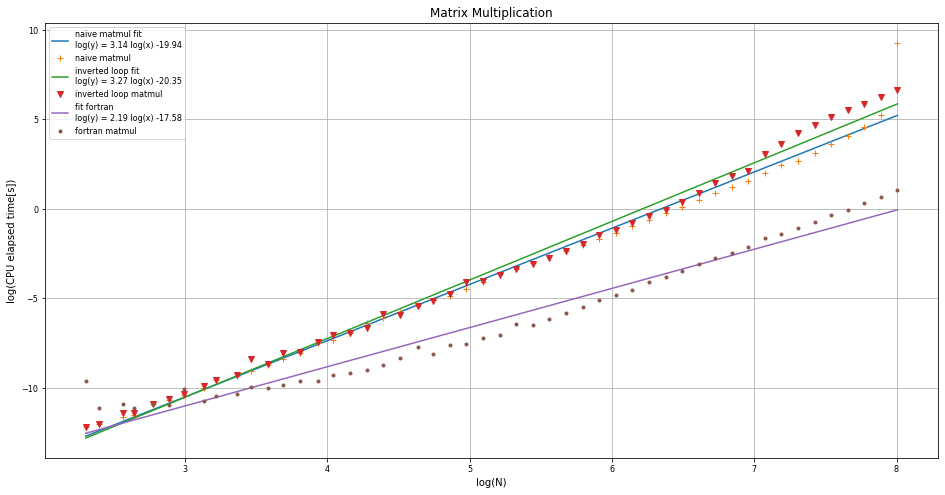

In [63]:
log_usual = np.log(usual_matmul)
log_cache = np.log(cache_matmul)
log_fortran = np.log(fortran_matmul)
log_N = np.log(N)

b_us, c_us = np.polyfit(log_N, log_usual, 1)
b_ca, c_ca = np.polyfit(log_N, log_cache, 1)
b_fo, c_fo = np.polyfit(log_N, log_fortran, 1)

print(b_us, c_us, b_ca, c_ca, b_fo, c_fo)
#this creates a function (numpy.pol1d object)
fit_us = np.poly1d((b_us, c_us)) 
fit_ca = np.poly1d((b_ca,c_ca))
fit_fo = np.poly1d((b_fo,c_fo))

fig, ax = plt.subplots(figsize = (16,8))

ax.plot(np.log(N), fit_us(np.log(N)), 
        label = 'naive matmul fit \n'+ 'log(y) = '+str(format(b_us, '.2f'))+' log(x) '+str(format(c_us, '.2f')))
ax.plot(np.log(N), log_usual, '+', label ='naive matmul')
ax.plot(np.log(N), fit_ca(np.log(N)), 
        label = 'inverted loop fit\n'+ 'log(y) = '+str(format(b_ca, '.2f'))+' log(x) '+str(format(c_ca, '.2f')))
ax.plot(np.log(N), log_cache, 'v', label ='inverted loop matmul')
ax.plot(np.log(N), fit_fo(np.log(N)), 
        label = 'fit fortran\n'+ 'log(y) = '+str(format(b_fo, '.2f'))+' log(x) '+str(format(c_fo, '.2f')))
ax.plot(np.log(N), log_fortran, '.', label ='fortran matmul')

ax.set(xlabel = 'log(N)', ylabel = 'log(CPU elapsed time[s])', title = 'Matrix Multiplication')
ax.legend()
ax.grid(True)

plt.savefig("Matrix multiplication fit.pdf")
